## Preamble

Run these if notebook is in a new environment, otherwise just skip to `Import modules`

#### Boot cell

Skip if `module_update.py` is in same folder as notebook, next cell downloads this file which in turn will download other files.

In [1]:
import dhlab.module_update as mu

In [2]:
from dhlab.module_update import update, css

In [3]:
css()

In [4]:
update('collocations')

Updated file `C:\Users\larsj\Documents\GitHub\Oversettelse\collocations.py`

In [5]:
from collocations import dist_coll_urn

# Import modules

Aktiver cellen nedenfor for å få alt til å virke.

In [6]:
import dhlab.nbtext as nb
from IPython.display import HTML
import requests
from bs4 import BeautifulSoup
import pandas as pd

def mods_digibok(urn, kind='marcxml'):
    """find information about serial number urn (or full urn) for books using NB API. 
    Parameter 'kind' is one of mods, marcxml or dublincore """
    
    if not str(urn).startswith('URN'):
        urnstr = "URN:NBN:no-nb_digibok_{urn}".format(urn=urn)
    r = requests.get("https://api.nb.no:443/catalog/v1/metadata/{ident}/{kind}".format(ident=urnstr, kind=kind))
    return r.text

def translator(urn):
    """Finds the translator for a book"""
    item = BeautifulSoup(mods_digibok(urn, kind='mods'), 'lxml')
    trans = []
    navn = item.find_all('name', {'type':'personal'})
    for i in navn:

        try:
            if i.roleterm.text == 'trl':
                trans.append(i.namepart.text)
        except:
            'nn'
    return ';'.join(trans)
    

In [7]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Egennavn \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += ', '.join(Grouping[cat]) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return



## Build corpus

A corpus definition is a set of URNs. Those can be obtained in various ways and stored as text or in MS-Word file.


### Define using metadata 

Lag korpus manuelt, fra excel eller andre kilder. Bare lim inn definisjonen mellom de triple """ """ under

korpus = nb.pure_urn("""
 .... lim inn URNer for korpusdefinisjon her som ren tekst ....
																
																
																
			Rammeverk:													
			-          Ikke nynorsk													
			-          1945 – 1955 og etter 2000													
			-          50 bøker i hver? – spørsmål til Lars. 100 i hver? 													
																
			-          Første oversettelse skal tas med, og den skal være publisert i de gitte periodene. 													
																
			            - Bøker som inneholder flere fortellinger har blitt utelatt. Kun hele romaner													
			            - En spredning på år og forfatter er forsøkt 													
			-          Ta notater på bøker som er oversatt to ganger – bare se på forskjellige oversettere – bare for å ha en liste 													
																
																
																
																
	Urn	Forfatter	Oversetter	År	Tittel	Forlag	Fra	Ord								
	2007012601009	Priestley, J.B.	Gjesdahl, Paul	1945	Mørklagt i Gretley	Aschehoug	eng	97 342,00	Spionroman							
	2007011501001	Han, Suyin	Feydt, Odd	1945	Morgen over Kina	Aschehoug	eng	132 830,00	Fictionalized autobiography							
	2014102708025	Beach, Rex	Grieg-Müller, John.	1945	Hevnerne	Nasjonalforl.	eng	73 671,00	Fiction							
	2012041308131	Norris, Frank	Skjønhaug, Arne.	1945	På eventyr i Stillehavet	Ekko	eng	49 039,00	Eventyrfiksjon							
	2016051148041	Lippincott, Joseph Wharton	Telnæs, Audun H.	1945	Villmarkens champion	Brann	eng	75553	Fiksjon, Ungdom							
	2007013101011	Williams, Valentine	Hopp, Egil Meidell	1945	Som kurér til Marrakesh	Bergendalh	eng	109 496,00	Fiksjon							
								537 931,00								
	2015042008014	Green, F.L.	Hav, Harald	1946	Siste mann ut	Bergendahl	             eng	115 082,00	Mysteriefortelling							
	2012101105071	Shute, Nevil	Toklum, Leif	1946	Livet og leken		eng	110 923,00	Fiksjon							
	2012111406019	Hemingway, Ernest	Gauguin, Paul	1946	Klokkene ringer for deg		eng	206 238,00	Krigsfortelling							
	2007020101046	Lewis, C.S.	Mannsåker, Randi Brun	1946	Djevelen dypper pennen		eng	37 523,00	Satire, brev, fiksjon							
	2015091406037	Johns, W.E.	Bjerre, Håkon;Braarvig, Hans	1946	Biggles i Spania	Damm	eng	39 119,00	Fiksjon							
	2011111708100	Hilton, James	Brenna, Anna-Cathrine	1946	Tilfeldighetens høst	Nasjonalforl.	eng	115 765,00	Krigsfortelling							
	2016102648133	Laurie-Long, E.	Coucheron, Olaf	1946	Spøkelset på S/S Dunsany	Green	eng	90 090,00	Fiksjon							
	2016020308166	Quentin, Patrick	Egge, Inger Borch.	1946	Døden i sirkus	Cappelen	eng	73 935,00	Fiksjon							
								788 675,00								
	2016010408096	Wilson, Dorothy Clarke	Andersen, Aage Hall.	1947	Broren	Lunde	eng	126597	Religiøs fiksjon							
	2014081508162	Brand, Max	Andresen, Per	1947	Jim Silver rydder opp	Nasjonalforl.	eng	54589	Fiksjon							
	2014102108180	Frank, Pat	Bjørge, Halvor	1947	Herr Adam	Mortensen	eng	99435	Fiksjon							
	2014120908100	Gray, Elisabeth Janet	Erichsen, Eivind.	1947	Sandy	Eide	eng	73 720,00	Kjærlighet, Ungdom							
	2011070606067	Maugham, W. Somerset	Fasting, Kaare	1947	Knivseggen	Gyldendal	eng	141 787,00	Dannelsesroman							
	2007012501047	Wright, Richard	Borgen, Johan	1947	Nigger	Gyldendal	eng	181587	Sosialroman, historisk							
								677 715,00								
	2012061406132	Dickens, Charles	Bjerke, Ejlert	1948	Store forventninger	Dreyer	eng	219 361,00	Dannelsesroman							
	2012061505152	Sinclair, Jo	Wahl, Trygve	1948	Yngste sønn	Tiden	eng	157 317,00	Fiksjon							
	2007012501054	Mason, Richard	Heddeland, Randi	1948	Vinden kan ikke lese	Gyldendal	eng	138 409,00	Krigsfortelling, fiksjon							
	2007060801007	Dickens, Charles	Ramstad, Petrine.	1948	Vesle Nelly		eng	54 104,00								
	2013082708199	Reymond, Dalton S.	Cappelen-Wangen, Else	1948	Skjebner i drift		eng	138 547,00								
	2013121106109	Flavin, Martin	Holmboe, Lotte	1948	Reise i mørke		eng	219 386,00								
	2016051048180	Joyce, James	Brøgger, Niels Chr.	1948	Portrett av kunstneren som ung mann	Mortensen	eng	98 744,00								
	2008042404018	Woolf, Virginia	Magnus, Peter	1948	De dro til fyret	Ernst G. Mortensen	eng	89 722,00								
	2007020701051	Hardy, Thomas	Malling, Liv	1948	Borgermesteren	Mortensen	eng	147 855,00								
	2007020500005	Sinclair, May	Wulfsberg, Camilla	1948	Røde valmuer	Dybwad	eng	29 670,00								
								1 293 115,00								
	2007022701076	Du Bois, William Pène	Johannessen, K. Stahl.;Ronold, Jan Arne;Ronold...	1949	Jorden rundt i ballong	Stabenfeldt	eng	37 075,00								
																
	2014021908080	Westcott, Jan	Wangen, Else Cappelen	1949	Stormfullt hav	Bergendahl	eng	132 113,00								
	2010102506020	Scott, Natalie Anderson	Kvam, Ragnar	1949	Mrs. Murphy		eng	217 088,00								
	2016041448248	Robbins, Harold	Johnssen, Arne	1949	Verden er min fiende		eng	186 084,00								
	2010102906108	Cain, James M.	Monrad, Knut	1949	Nattsvermeren	Høvik	eng	148 397,00								
	2014030308388	Margetson, Stella	Mossige, Sigrid Munthe	1949	Peters kone		eng	90 707,00								
	2013080608057	Buchan, John	Knudsen, Ranka	1949	De niogtredve trinnene	Aschehoug	eng	49 116,00								
								860 580,00								
	2008042204074	Kipling, Rudyard	Bergh, Kirsten	1950	Lyset som svant	Mortensen	eng	85 888,00								
	2011050420020	Christie, Agatha	Dahl, Fridtjof	1950	Ugler i mosen	Aschehoug	eng	84 889,00								
	2011030422001	Standish, Robert	Tranøy, B. S.	1950	Boomerang		eng	139 051,00								
	2016060848216	Orwell, George	Width, Trygve	1950	1984	Gyldendal	eng	118 115,00								
	2011030220007	Innes, Hammond	Jakobsen, Einar	1950	Blodspor i snøen	Cappelen	eng	77 850,00								
	2007022701074	Spring, Howard	Hoell, Andreas	1950	Til ærens tinde	Gyldendal	eng	313 664,00								
								819 457,00								
	2008042800117	Saville, Malcolm	Hagerup, Anders	1951	Varselsfuglen	Aschehoug	eng	67 952,00								
	2012022908008	Carroll, Lewis	Hopp, Zinken	1951	Gjennom speilet	Eide	eng	38 388,00								
	2016051148001	Twain, Mark	Hagerup, Inger	1951	Prinsen og fattiggutten		eng	51 403,00								
	2008042204160	Lea, Tom	Ørjasæter, Jo	1951	Tyrefekteren fra Guerreras	Dreyer	eng	86 961,00								
	2008042404035	Bristow, Gwen	Olden, Caro	1951	På spor etter lykken	Gyldendal	eng	274 784,00								
								519 488,00								
	2011070805079	Lawrence, D.H.	Strøm, Leo	1952	Lady Chatterleys elsker		eng	170 294,00								
	2011071406026	Forester, C.S.	Thommessen, Gunnar.	1952	Løytnant Hornblower	Aschehoug	eng	102 556,00								
	2013042508017	Lewisohn, Ludwig	Knutsen, Lalli	1952	Don Juan	Bladkompaniet	eng	70 981,00								
	2008050800070	Green, Henry	Lie, Nils	1952	Elskov	Gyldendal	eng	95 456,00								
	2011112308129	Richardson, Henry Handel	Tomtum, Ivar Widerøe	1952	Ungarsk blod		eng	111 335,00								
								550 622,00								
	2008043004049	Cousteau, Jacques-Yves	Braarvig, Hans	1953	Den tause verden	Eide	eng	73 131,00								
	2014101308071	Brown, Fredric	Knutsen, Fridtjof	1953	Statuetten som skrek	Forlagshuset	eng	75 872,00								
	2008051500097	Caine, Hall	Nissen-Drejer, Ruth	1953	Ralph Ray	Ansgar	eng	85 508,00								
	2011070108147	Hammett, Dashiell	Norum, Tryggve	1953	tynne mann	Gyldendal	eng	72 664,00								
	2012020908035	Rooke, Daphne	Prytz, Carl Frederik	1953	Mittie	Tiden	eng	114 062,00								
								421 237,00								
	2007061201007	Von Hagen, Christine	Døscher, Lise.	1954	Elvia i urskogen	Gyldendal	eng	48 537,00								
	2011111808052	McGraw, Eloise Jarvis	Farland, Erik.	1954	Sporet i villmarken	Green	eng	88 507,00								
	2007040201028	Douglas, Lloyd C.	Frodesen, Leiv	1954	Grønt lys	Nasjonalforl.	eng	132 742,00								
	2013042908150	MacDonald, John D.	Gunnufsen, H. Chr.	1954	Syndens sold	Bladkompaniet	eng	69 418,00								
	2014031808130	Bradbury, Ray	Hauge, Eivind	1954	Kom hjem! Kom hjem!	Eide	eng	91 274,00								
								430 478,00								
	2007022701037	Hanley, Gerald	Amlie, Axel	1955	Det store løveåret	Gyldendal	eng	117 455,00								
	2007022301048	Costain, Thomas B.	Gammelgaard, Arthur W.	1955	hellige ild		eng	238 666,00								
	2007020501008	Franken, Rose	Schjelderup, Daisy	1955	Ja til livet		eng	118 036,00								
	2013112708060	Popkin, Zelda	Bommen, Anton	1955	Døden spanderer	Bergendahl	eng	93 337,00								
	2011070710022	Fleming, Ian	Dalen, Erling.	1955	Å leve og la dø	Nasjonalforlaget	eng	76 018,00								
	2013042338078	Frazee, Steve	Faye-Lund, Hans	1955	Kvinnelist	Bladkompaniet	eng	63 363,00								
	2013050208018	Heckelmann, Charles N.	Gleditsch, Ulf	1955	Hevnens legion	Bladkompaniet	eng	63 849,00								
								770 724,00								
																
	Sum							7 670 022,00								

""")
len(korpus)

In [8]:
korpus_nob = nb.get_urn({
                     'year':1950, 
                     'next':20,
                    'ddk':"839%",
                     'trans':'',
                     'limit':70})
len(korpus_nob)

70

In [9]:
korpus = nb.get_urn({
                     'year':1950, 
                     'next':20,
                    'ddk':"839%",
                     'trans':'eng',
                     'limit':70})
len(korpus_nob)

70

# Henter bøkene med ord

Her defineres korpuset som en liste over bøker, med informasjon om oversettere. Er korpuset stort (flere hundre) vil det ta noen minutter å hente alle oversetterne, så det kan være lurt å kutte ned størrelsen litt. Inntil vi får på plass en rask måte å gjøre det på, får det her duge. Det er bare å smøre seg med tålmodighet.

## Search corpus for concordances

In [10]:
from random import sample

In [12]:
nb.get_urnkonk('leende', {'urns':korpus})

"Siste fortellinger, Blixen, Karen, 1957","igjen , og begeistret og",leende,styrter de mot sin gamle
"Siste fortellinger, Blixen, Karen, 1957",. Seiv var hun en,leende,"person , og Marcus Cocozza"
"Siste fortellinger, Blixen, Karen, 1957",meget runde former . Et,leende,fransk utrop ble slengt tilbake
"Siste fortellinger, Blixen, Karen, 1957","og hilst av blussende ,",leende,venner eller om en übønnhørhg
"Siste fortellinger, Blixen, Karen, 1957","det , » svarte Yorik",leende,. « Du har sagt
"Tropelegen, De Hartog, Jan, 1958","iulle n ^ vde ,",leende,", men med nete tarer"
"Mysterium i Vestindia, Christie, Agatha, 1968","De dukket plutselig opp ,",leende,og pratende. De slo seg
"Mysterium i Vestindia, Christie, Agatha, 1968",None,leende,og reiste seg . «
"Fortellinger om Kong Artur og ridderne av det runde bord, Undset, Sigrid, 1953","dronningen , og hun tok",leende,"imot det , drog det"
"Fortellinger om Kong Artur og ridderne av det runde bord, Undset, Sigrid, 1953",til Lancelot og bød ham,leende,smykke sig . Lancelot stod
"Rare dyr og sprø slektninger, Durrell, Gerald, 1970",mot huset av en flokk,leende,"og spøkende venner , samtidig"


In [ ]:
nb.get_urnkonk('leende', {'urns':sample(korpus_nob, 50)})

# Definer teksten

Hen teksten - kan ta noe minutter. Kan lagres for senere bruk.

In [13]:
nb.frame(korpus)[0]

0     2007052500060
1     2011120108100
2     2011122208027
3     2014080808091
4     2007052301060
5     2013042908151
6     2011050604152
7     2011022305015
8     2007050700010
9     2008050604001
10    2007072501020
11    2007060401026
12    2007050300021
13    2014050705078
14    2007022101089
Name: 0, dtype: int64

In [14]:
#TEXT = nb.get_corpus_text(list(nb.frame(korpus)[0]))

#with open ('korpus_file.csv','w',encoding="utf-8") as f:
 #   TEXT.to_csv(path_or_buf=f)

#TEXT_NOB = nb.get_corpus_text(list(nb.frame(korpus_nob)[0]))

#with open ('korpus_file_nob.csv','w',encoding="utf-8") as f:
#    TEXT_NOB.to_csv(path_or_buf=f)

In [15]:
TEXT = pd.read_csv("korpus_file.csv",index_col=0 )

In [16]:
TEXT_NOB = pd.read_csv('korpus_file_nob.csv', index_col=0)

#### convertet to md
import pandas as pd
with open ('korpus_file.csv','r', encoding="utf-8") as f:
    text = pd.read_csv(f)

In [17]:
TEXT.sort_values(by=TEXT.columns[0], ascending=False)[:10]

,2007012601009,2007011501001,2014102708025,2012041308131,2016051148041,2007013101011,2015042008014,2012101105071,2012111406019,2007020101046,...,2007040201028,2013042908150,2014031808130,2007022701037,2007022301048,2007020501008,2013112708060,2011070710022,2013042338078,2013050208018
.,5119.0,6330.0,4262.0,2732.0,3218.0,6288.0,6811.0,7284.0,13751.0,1313.0,...,5692.0,4223.0,5729.0,6111.0,10654.0,6327.0,7132.0,4732.0,4091.0,3498.0
",",3527.0,5232.0,3146.0,1855.0,2741.0,3777.0,5739.0,3907.0,7524.0,1269.0,...,4970.0,4268.0,4904.0,4984.0,9318.0,5005.0,3500.0,2801.0,2476.0,2182.0
«,2013.0,370.0,1909.0,117.0,372.0,242.0,16.0,2824.0,513.0,248.0,...,2202.0,38.0,2322.0,433.0,4502.0,4164.0,2517.0,1080.0,1442.0,26.0
»,1953.0,581.0,1885.0,119.0,377.0,158.0,15.0,2798.0,496.0,236.0,...,2143.0,31.0,2309.0,483.0,4201.0,3948.0,2487.0,1037.0,1413.0,24.0
og,1683.0,3876.0,1844.0,1540.0,2625.0,1680.0,3392.0,3122.0,7468.0,773.0,...,2592.0,2133.0,3194.0,3066.0,5199.0,1842.0,1800.0,2442.0,1521.0,1818.0
jeg,1657.0,705.0,840.0,266.0,115.0,1361.0,460.0,789.0,1692.0,157.0,...,553.0,1551.0,565.0,547.0,1576.0,819.0,703.0,307.0,286.0,312.0
en,1574.0,2161.0,950.0,689.0,926.0,1744.0,1386.0,1536.0,2228.0,575.0,...,2074.0,1049.0,1195.0,1928.0,3274.0,1184.0,1282.0,1188.0,955.0,911.0
i,1541.0,2557.0,1131.0,985.0,1294.0,2235.0,2244.0,1805.0,3114.0,624.0,...,2091.0,1030.0,1681.0,1863.0,3966.0,1568.0,1449.0,1535.0,986.0,1291.0
6,1516.0,2273.0,2.0,2.0,3.0,604.0,2.0,1.0,3.0,52.0,...,1054.0,1.0,4.0,1325.0,1941.0,1108.0,2.0,3.0,4.0,1.0
^,1514.0,1182.0,4.0,2.0,12.0,939.0,1.0,1.0,NaN,74.0,...,1829.0,1.0,2.0,848.0,4363.0,1998.0,NaN,1.0,4.0,14.0


### Starter med listen over mulige partisipper

In [18]:
TEXT.index = TEXT.index.map(str)

In [19]:
poss_part = list ({x for x in TEXT.index if x.endswith('ende')})

In [20]:
TEXT.index

Index(['.', ',', '«', '»', 'og', 'jeg', 'en', 'i', '6', '^',
       ...
       '”', '„', '€', '™', '■', '►', '▼', '♦', '✓', '❖'],
      dtype='object', length=226376)

### Henter ut de 100 mest frekvente

In [21]:
N = 200
test_words = list(TEXT.loc[TEXT.index.str.contains(".*ende")].sum(axis=1).sort_values(ascending=False)[:N].index)

In [22]:
variants = dict()
for w in test_words:
    variants[w] = nb.word_paradigm(w)

In [23]:
forms = dict()
for w in test_words:
    forms[w] = nb.word_form(w)

In [24]:
nb.frame(variants)

,0,1,2,3
hendene,"[subs, [henda, hende, hendene, hender, hendet,...",None,None,None
stående,"[adj, [stående, stått, ståtte]]","[verb, [sto, stod, stå, ståes, står, stås, stå...",None,None
hender,"[adj, [hendende, hendt, hendte]]","[subs, [henda, hende, hendene, hender, hendet,...","[verb, [hend, hende, hender, hendes, hendt, he...",None
endelig,"[adj, [endelig, endelige, endeligere, endeligs...",None,None,None
hende,"[adj, [hendende, hendt, hendte, hende]]","[subs, [henda, hende, hendene, hender, hendet]]","[verb, [hend, hende, hender, hendes, hendt, he...",None
levende,"[adj, [levd, levde, levede, levende, levet, le...","[verb, [lev, levd, levde, leve, lever, leves, ...",None,None
sende,"[adj, [sendende, sendt, sendte]]","[verb, [send, sende, sender, sendes, sendt, se...",None,None
enden,"[subs, [ende, enden, endene, ender]]",None,None,None
rasende,"[adj, [rasa, rasende, rast, raste]]","[adv, [rasende]]","[verb, [ras, rasa, rase, raser, rases, rast, r...",None
sittende,"[adj, [sitne, sitten, sittende, sittet]]","[verb, [satt, sitt, sitte, sitter, sittes, sit...",None,None


## Velg former

Plukk ut partisippformene, dersom formen opptrer både som adjektiv og som verb, ellers ut. Nedenfor plukkes ut de alternative verbformene som kan sammenlignes med partisippen.

Her benyttes en enkelt heuristikk. Partisippformen må være oppført både som et adjektiv og et verb, i tillegg må ikke formen selv være blandt verbene.

In [25]:
participles = dict()
for w in variants:
    # finn POS for alle variantene
    kinds = [x[0] for x in variants[w]]
    
    # sjekk at både adj og verb er blant dem
    if 'adj' and 'verb' in kinds:
        
        # Ta ut de som har formen blant verbene (partisippet er ikke verd i NO)
        F = [k[1] for k in variants[w] if k[0] == 'verb' and not w in k[1] ]
        if F != []:
            participles[w] = F

## Se på resultatet

In [26]:
participles

{'stående': [['sto', 'stod', 'stå', 'ståes', 'står', 'stås', 'stått']],
 'levende': [['lev', 'levd', 'levde', 'leve', 'lever', 'leves', 'levet']],
 'rasende': [['ras', 'rasa', 'rase', 'raser', 'rases', 'rast', 'raste']],
 'sittende': [['satt', 'sitt', 'sitte', 'sitter', 'sittes', 'sittet']],
 'strålende': [['strål', 'stråle', 'stråler', 'stråles', 'strålt', 'strålte']],
 'liggende': [['ligg', 'ligge', 'ligger', 'ligges', 'ligget', 'lå', 'låg']],
 'smilende': [['smil', 'smile', 'smiler', 'smiles', 'smilt', 'smilte']],
 'skjelvende': [['skalv',
   'skjelv',
   'skjelve',
   'skjelver',
   'skjelves',
   'skjelvet']],
 'skinnende': [['skein',
   'skinn',
   'skinne',
   'skinner',
   'skinnes',
   'skint',
   'skinte']],
 'brennende': [['brenn',
   'brenne',
   'brenner',
   'brennes',
   'brent',
   'brente',
   'brann',
   'brant']],
 'spennende': [['spenn', 'spenne', 'spenner', 'spennes', 'spent', 'spente']],
 'utseende': [['utse', 'utsees', 'utser', 'utses', 'utsett', 'utså', 'utsåg']

Nå lager vi en ny statistikk der alle ordene telles opp fra datarammen for sammenligning

In [27]:
counts = dict()
for w in participles:
    counts[w] = max(1, TEXT.loc[list(set(participles[w][0]) & set(TEXT.index))].sum(axis=1).sum())

In [28]:
counts_nob = dict()
for w in participles:
    counts_nob[w] = max(1, TEXT_NOB.loc[list(set(participles[w][0]) & set(TEXT_NOB.index))].sum(axis=1).sum())

In [29]:
counts_nob

{'stående': 4656.0,
 'levende': 971.0,
 'rasende': 145.0,
 'sittende': 4288.0,
 'strålende': 72.0,
 'liggende': 2632.0,
 'smilende': 966.0,
 'skjelvende': 188.0,
 'skinnende': 213.0,
 'brennende': 335.0,
 'spennende': 202.0,
 'utseende': 7.0,
 'gående': 8631.0,
 'hengende': 549.0,
 'truende': 869.0,
 'løpende': 421.0,
 'passende': 497.0,
 'lignende': 208.0,
 'triumferende': 11.0,
 'spørrende': 1360.0,
 'glimrende': 12.0,
 'glødende': 59.0,
 'vedkommende': 14.0,
 'beroligende': 22.0,
 'lysende': 1336.0,
 'skremmende': 105.0,
 'gjennomtrengende': 2.0,
 'følgende': 939.0,
 'ertende': 202.0,
 'imponerende': 33.0,
 'oppmuntrende': 19.0,
 'undersøkende': 85.0,
 'bebreidende': 26.0,
 'forbausende': 79.0,
 'glitrende': 28.0,
 'nølende': 27.0,
 'skrikende': 548.0,
 'utelukkende': 12.0,
 'utfordrende': 6.0,
 'rørende': 251.0,
 'flammende': 84.0,
 'skingrende': 5.0,
 'overraskende': 77.0,
 'blendende': 16.0,
 'beundrende': 57.0,
 'farende': 19232.0,
 'irriterende': 57.0,
 'advarende': 37.0,
 'ove

In [30]:
counts

{'stående': 10851.0,
 'levende': 2227.0,
 'rasende': 302.0,
 'sittende': 11015.0,
 'strålende': 248.0,
 'liggende': 6238.0,
 'smilende': 3862.0,
 'skjelvende': 802.0,
 'skinnende': 580.0,
 'brennende': 788.0,
 'spennende': 574.0,
 'utseende': 18.0,
 'gående': 27203.0,
 'hengende': 1613.0,
 'truende': 543.0,
 'løpende': 2311.0,
 'passende': 1659.0,
 'lignende': 549.0,
 'triumferende': 36.0,
 'spørrende': 7751.0,
 'glimrende': 11.0,
 'glødende': 166.0,
 'vedkommende': 32.0,
 'beroligende': 161.0,
 'lysende': 4092.0,
 'skremmende': 521.0,
 'gjennomtrengende': 9.0,
 'følgende': 2955.0,
 'ertende': 335.0,
 'imponerende': 114.0,
 'oppmuntrende': 150.0,
 'undersøkende': 582.0,
 'bebreidende': 162.0,
 'forbausende': 673.0,
 'glitrende': 111.0,
 'nølende': 320.0,
 'skrikende': 1485.0,
 'utelukkende': 59.0,
 'utfordrende': 40.0,
 'rørende': 1234.0,
 'flammende': 350.0,
 'skingrende': 28.0,
 'overraskende': 426.0,
 'blendende': 66.0,
 'beundrende': 275.0,
 'farende': 55037.0,
 'irriterende': 287.

# Legg til opptellinger for partisippene

In [31]:
count_frame = {x: {'verb_paradigm': counts[x], 'participle': TEXT.loc[x].sum()} for x in counts}

In [32]:
count_frame_nob = {x: {'verb_paradigm': counts_nob[x], 'participle': TEXT_NOB.loc[x].sum()} for x in counts_nob}

In [33]:
count_frame

{'stående': {'verb_paradigm': 10851.0, 'participle': 1122.0},
 'levende': {'verb_paradigm': 2227.0, 'participle': 599.0},
 'rasende': {'verb_paradigm': 302.0, 'participle': 572.0},
 'sittende': {'verb_paradigm': 11015.0, 'participle': 561.0},
 'strålende': {'verb_paradigm': 248.0, 'participle': 508.0},
 'liggende': {'verb_paradigm': 6238.0, 'participle': 388.0},
 'smilende': {'verb_paradigm': 3862.0, 'participle': 362.0},
 'skjelvende': {'verb_paradigm': 802.0, 'participle': 312.0},
 'skinnende': {'verb_paradigm': 580.0, 'participle': 304.0},
 'brennende': {'verb_paradigm': 788.0, 'participle': 259.0},
 'spennende': {'verb_paradigm': 574.0, 'participle': 246.0},
 'utseende': {'verb_paradigm': 18.0, 'participle': 246.0},
 'gående': {'verb_paradigm': 27203.0, 'participle': 236.0},
 'hengende': {'verb_paradigm': 1613.0, 'participle': 211.0},
 'truende': {'verb_paradigm': 543.0, 'participle': 186.0},
 'løpende': {'verb_paradigm': 2311.0, 'participle': 183.0},
 'passende': {'verb_paradigm':

In [34]:
COUNTS = nb.frame(count_frame)

In [35]:
COUNTS.head()

,verb_paradigm,participle
advarende,234.0,82.0
angående,267.0,77.0
anstrengende,206.0,68.0
avgjørende,337.0,80.0
bebreidende,162.0,101.0


In [36]:
COUNTS_NOB = nb.frame(count_frame_nob)

In [37]:
COUNTS_NOB.head()

,verb_paradigm,participle
advarende,37.0,14.0
angående,45.0,28.0
anstrengende,40.0,12.0
avgjørende,95.0,69.0
bebreidende,26.0,10.0


In [38]:
TOT = nb.totals(50000)

In [39]:
TOT = nb.frame(TOT)

Legg til en kolonne med ratioen melllom de to første. 

In [40]:
COUNTS['ratio'] = COUNTS['participle']/(COUNTS['participle']+COUNTS['verb_paradigm'])

In [41]:
COUNTS_NOB['ratio'] = COUNTS_NOB['participle']/(COUNTS_NOB['participle']+COUNTS_NOB['verb_paradigm'])

# Sortér på ratio

Her ser vi klart at det kanskje ikke er ekte partisipper på topp, mer typiske ord i partisippform.

De mest interessante ordene (tror jeg) er på bunnen her, som 'smilende', 'løpende', 'liggende', 'spørrende'. Og den ratioen kan sammenlignes med norsk sett.

In [42]:
COUNTS.sort_values(by='ratio', ascending=False)

,verb_paradigm,participle,ratio
bedårende,2.0,45.0,0.957447
tilsvarende,2.0,41.0,0.953488
sjarmerende,4.0,67.0,0.943662
utseende,18.0,246.0,0.931818
glimrende,11.0,149.0,0.931250
gjennomtrengende,9.0,106.0,0.921739
triumferende,36.0,155.0,0.811518
vedkommende,32.0,135.0,0.808383
skingrende,28.0,88.0,0.758621
fortryllende,23.0,58.0,0.716049


In [43]:
COUNTS_NOB.sort_values(by='ratio', ascending=False)

,verb_paradigm,participle,ratio
tilsvarende,1.0,42.0,0.976744
gjennomtrengende,2.0,25.0,0.925926
bedårende,1.0,7.0,0.875000
sjarmerende,1.0,6.0,0.857143
utseende,7.0,25.0,0.781250
vedkommende,14.0,50.0,0.781250
utfordrende,6.0,19.0,0.760000
utelukkende,12.0,34.0,0.739130
triumferende,11.0,29.0,0.725000
skingrende,5.0,11.0,0.687500


# Sammenligner ratio for oversatt mot NOB

In [44]:
COMP = COUNTS['ratio']/COUNTS_NOB['ratio']

In [45]:
HTML(nb.frame(COMP.sort_values(ascending=False)).to_html())

,ratio
verkende,7.301961
lovende,5.120766
ertende,4.587285
bydende,4.313629
larmende,4.021622
truende,3.831276
tiltrekkende,3.703911
besøkende,3.675320
liknende,2.974313
glimrende,2.793750


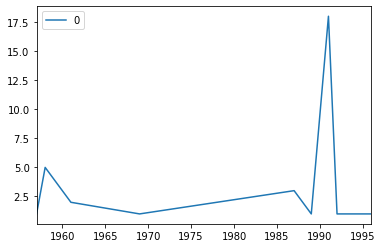

In [46]:
nb.unigram('verkende', ddk="839%", trans='eng', period=(1945, 2000)).plot()

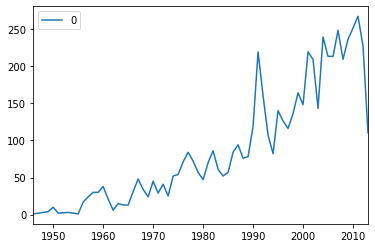

In [67]:
nb.unigram('verkende', ddk="839%", trans='', period=(1945, 2020)).plot()

In [68]:
nb.get_freq(2019102448008)

Counter({',': 1136,
         '.': 608,
         'og': 597,
         '!': 461,
         'i': 399,
         'at': 308,
         'de': 271,
         'med': 245,
         'var': 241,
         'paa': 232,
         'til': 227,
         '„': 219,
         'som': 198,
         'af': 198,
         'den': 197,
         'for': 187,
         'en': 170,
         '—': 169,
         'han': 154,
         '“': 153,
         'det': 152,
         'havde': 126,
         'sig': 115,
         'saa': 105,
         'Og': 98,
         'ikke': 97,
         'Jørgen': 88,
         'et': 84,
         'alle': 84,
         'da': 78,
         'sin': 77,
         'fra': 75,
         'denne': 75,
         'om': 73,
         'sine': 70,
         ':': 69,
         'der': 68,
         '"': 63,
         'ham': 58,
         'blev': 58,
         'Det': 58,
         'efter': 57,
         'skulde': 56,
         'er': 55,
         'sit': 54,
         'dem': 54,
         'Russen': 54,
         'Men': 54,
         'over': 49,
   

In [48]:
counts_tot = dict()
for w in participles:
    counts_tot[w] = max(1, TOT.loc[list(set(participles[w][0]) & set(TOT.index))].sum(axis=1).sum())

In [49]:
counts_tot

{'stående': 19437983,
 'levende': 5312408,
 'rasende': 635995,
 'sittende': 19514023,
 'strålende': 323529,
 'liggende': 14864068,
 'smilende': 3740043,
 'skjelvende': 683719,
 'skinnende': 864480,
 'brennende': 1559790,
 'spennende': 751509,
 'utseende': 73206,
 'gående': 39842605,
 'hengende': 2623103,
 'truende': 2250953,
 'løpende': 4492046,
 'passende': 3018854,
 'lignende': 1124850,
 'triumferende': 1,
 'spørrende': 7493284,
 'glimrende': 1,
 'glødende': 214013,
 'vedkommende': 67666,
 'beroligende': 161135,
 'lysende': 5765415,
 'skremmende': 643472,
 'gjennomtrengende': 1,
 'følgende': 8535735,
 'ertende': 492511,
 'imponerende': 200342,
 'oppmuntrende': 242364,
 'undersøkende': 1342556,
 'bebreidende': 122541,
 'forbausende': 400348,
 'glitrende': 131025,
 'nølende': 385535,
 'skrikende': 1517043,
 'utelukkende': 329885,
 'utfordrende': 224945,
 'rørende': 1620765,
 'flammende': 286779,
 'skingrende': 1,
 'overraskende': 561859,
 'blendende': 45274,
 'beundrende': 310904,
 'fa

In [50]:
count_frame_tot = {x: {'verb_paradigm': counts_tot[x], 'participle': TOT.loc[x].sum()} for x in counts_tot if x in TOT.index}

In [51]:
TOTCOUNT = nb.frame(count_frame_tot)

In [52]:
TOTCOUNT

,verb_paradigm,participle
advarende,336853,66111
angående,572794,267385
anstrengende,247621,72006
avgjørende,1212211,1008752
bebreidende,122541,42515
beroligende,161135,171112
beskyttende,935404,101438
besøkende,1711432,124985
beundrende,310904,55098
bitende,2679536,55127


In [53]:
TOTCOUNT['ratio'] = TOTCOUNT['participle']/(TOTCOUNT['participle']+TOTCOUNT['verb_paradigm'])

In [54]:
TOTCOUNT.sort_values(by='ratio', ascending=False)

,verb_paradigm,participle,ratio
glimrende,1,185539,0.999995
sjarmerende,1,103095,0.999990
triumferende,1,96177,0.999990
skingrende,1,70651,0.999986
gjennomtrengende,1,53225,0.999981
fortryllende,1,40939,0.999976
tindrende,1,40506,0.999975
vedkommende,67666,1744651,0.962663
utseende,73206,348198,0.826281
tilsvarende,429668,1682439,0.796569


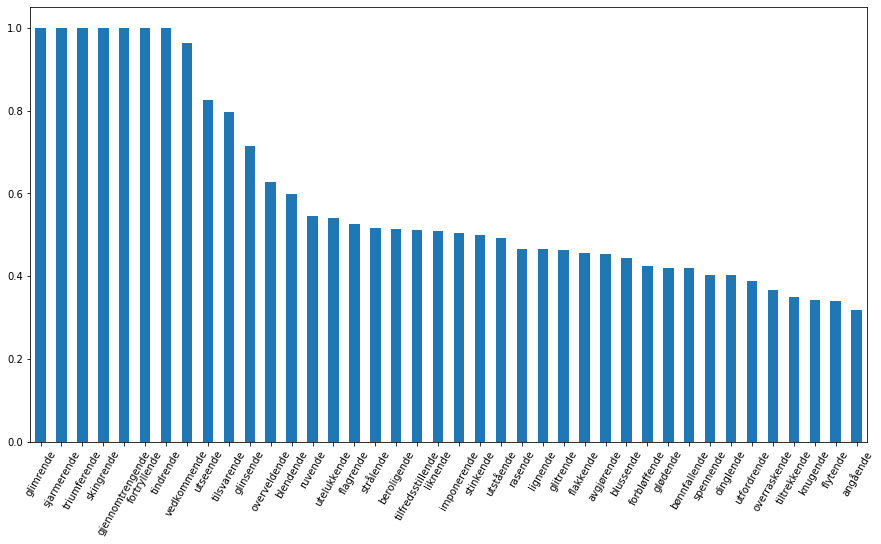

In [55]:
TOTCOUNT.sort_values(by='ratio', ascending=False)[:40]['ratio'].plot(kind='bar', figsize=(15, 8), rot=60)

In [56]:
relaterte = dict()
for w in TOTCOUNT.sort_values(by='ratio', ascending=False)[:50].index:
    try:
        relaterte[w] = nb.relaterte_ord(w)
    except:
        print('problem: ', w)

problem:  triumferende
problem:  skingrende
problem:  gjennomtrengende
problem:  tindrende
problem:  vedkommende
problem:  glinsende
problem:  overveldende
problem:  ruvende
problem:  utelukkende
problem:  utstående
problem:  glitrende
problem:  flakkende
problem:  blussende
problem:  forbløffende
problem:  bønnfallende
problem:  dinglende
problem:  knugende
problem:  flytende
problem:  angående
problem:  dirrende
problem:  larmende
problem:  bebreidende
problem:  forbausende


In [57]:
for participle in relaterte:
    mu.printmd("## {p} \n {words}\n".format(p=participle, words = ", ".join(relaterte[participle])))

## glimrende 
 snø, sol, sne, glimrende, kuldegrader, vind, regn, fint, kulde, slaps, is, sludd, frost, skiføre, isdekke, glatt, vindstille, tåke, fleksibel, nydelig


## sjarmerende 
 sjarmerende, morsom, hyggelig, underholdende, blid, utadvendt, innholdsrik, lærerik, dyktig, grei, kjekk, tiltalende, koselig, vittig, interessant, søt, spennende, inspirerende, omgjengelig, hjelpsom


## fortryllende 
 fargerik, poetisk, dramatisk, humoristisk, vakker, fortryllende, festlig, fantasifull, flott, frodig, spennende, variert, mangfoldig, morsom, vittig, vakkert, varm, musikalsk, burlesk, realistisk


## utseende 
 utseende, kvalitet, karakter, innhold, stil, størrelse, personlighet, smak, farge, sjarm, form, konsistens, omfang, soliditet, særpreg, væremåte, egenart, design, atmosfære, sunnhet


## tilsvarende 
 erfaring, kunnskap, praksis, kunnskaper, innsikt, rutine, utdannelse, kvalifikasjoner, kompetanse, relevant, fortrinnsvis, minimum, helst, allsidig, solid, tilsvarende, storhusholdning, servicehandel, ledererfaring, bakgrunn


## blendende 
 rent, blendende, tørt, hvitt, pent, blankt, ryddig, friskt, fint, vakkert, klart, velspilte, gammel, ny, spennende, reflekser


## flagrende 
 lys, flagrende, luft, romslig, vann, vand, pen, lyd, løst


## strålende 
 sol, strålende, vind, sne, kuldegrader, regn, fint, vindstille, varmegrader, plussgrader, himmel, varig, minusgrader, solskinn, frisk, tåke, varme, sjø, utsikt, tropevarme


## beroligende 
 amfetamin, alkohol, beroligende, avslappende, tabletter, piller, narkotiske, hasj, stimulerende, smertestillende, styrkende, ecstasy, LSD, rohypnol, hasjisj, kokain, marihuana, ecstacy, heroin, metamfetamin


## tilfredsstillende 
 forsvarlig, rasjonelt, betryggende, effektiv, tilfredsstillende, rimelig, stabil, tidsmessig, hurtig, billig, økonomisk, riktig, hensiktsmessig, fornuftig, effektivt, sikker, skånsom, målrettet, miljøvennlig, langsiktig


## liknende 
 konserter, messer, liknende, lignende, andre, arrangementer, utstillinger, seminarer, festivaler, workshops, teater, kunstutstillinger, plateinnspillinger, forestillinger, foredrag, turneer, teaterforestillinger, markeder, konferanser, kongresser


## imponerende 
 spennende, inspirerende, skremmende, imponerende, rørende, morsomt, morsom, fengende, variert, utfordrende, engasjerende, utviklende, krevende, lærerik, lærerikt, givende, dramatisk, vakker, flott, storslått


## stinkende 
 forurensende, støyende


## rasende 
 oppgitt, skuffet, fortvilet, forbannet, lei, frustrerte, sint, opprørt, sjokkert, frustrert, irritert, sinte, rasende, provosert, deprimert, såret, desillusjonert, forbanna, føler, fortvilt


## lignende 
 konserter, messer, lignende, arrangementer, utstillinger, festivaler, seminarer, workshops, andre, turneer, teater, kunstutstillinger, plateinnspillinger, foredrag, forestillinger, teaterforestillinger, markeder, konferanser, kongresser, stands


## avgjørende 
 viktig, avgjørende, krevende, interessant, viktige, spennende, sentrale, verdifull, nødvendig, verdifullt, prinsipiell, riktig, sentral, positivt, nyttig, meningsfylt, gledelig, endelige, utfordrende, interessante


## glødende 
 røyk, aske, glødende, damp, sot, ild, støv, pliktoppfyllende, dyr, flammer, fyll, husdyr, alkohol, lukt, snus, slagg, svovel, lava, ruiner, stein


## spennende 
 spennende, utfordrende, interessant, utviklende, givende, lærerikt, krevende, lærerik, variert, inspirerende, underholdende, morsomt, interessante, engasjerende, morsom, selvstendig, hektisk, stimulerende, varierte, utfordrande


## utfordrende 
 utviklende, utfordrende, spennende, krevende, inspirerende, interessant, givende, lærerikt, stimulerende, interessante, lærerike, lærerik, Interessant, variert, selvstendig, varierende, selvstendige, varierte, allsidige, engasjerende


## overraskende 
 spennende, artig, morsom, morsomt, overraskende, interessant, hyggelig, utfordrende, underholdende, inspirerende, skremmende, lærerik, provoserende, variert, annerledes, lærerikt, givende, hektisk, nyttig, velspilt


## tiltrekkende 
 sjarmerende, tiltrekkende, spennende, skremmende, morsom, søt, underholdende, hyggelig, sexy, variert, pen, vakker, koselig, innholdsrik, tiltalende, ungdommelig, intelligent, frastøtende, sund, mystisk


## blomstrende 
 gronne, grønne, trivelige, blomstrende, rolige, barnevennlige, landlige, rode, frodige, gule, solrike, hvite, gjestfrie, allsidige, blå, hyggelige, hjelpsomme, dyktige, brune, røde


## oppmuntrende 
 inspirerende, stimulerende, hyggelig, spennende, overraskende, morsomt, utfordrende, trivelig, engasjerende, utviklende, krevende, faglig, lærerik, ekspansivt, uformelt, aktivt, oppmuntrende, gledelig, positivt, lærerikt


## skremmende 
 skremmende, spennende, trist, tankevekkende, sjokkerende, farlig, overraskende, übehagelig, truende, fascinerende, skuffende, uvirkelig, vond, tiltrekkende, mystisk, uforutsigbare, uhyggelig, pirrende, morsom, interessant


## følgende 
 administrasjon, følgende, politikere, økonomi, politikarar, ledelse, planlegging, organisasjon, styre, forvaltning, drift, markedsføring, aksjekapital, lån, fslgende, folgende, felgende, Eftermiddag, hjulsdrift, fellesadministrasjon


## skjelvende 
 redd, skjelvende, fortvilet, utrygg, engstelig, nervøs, sint, usikker, forvirret, bekymret, ensom, skremt, urolig, oppskaket, tungt, trist, grått, mørkt, tøft, vått


## nølende 
 usikre, usikker, forvirret, famlende, usikkert, sjenert, nølende, avventende, vanskelige, utrygge, nervøse, urolige, engstelige, frustrerte, redde, forsiktig, redd, nervøs, utrygg, spent


In [58]:
TOTCOUNT

,verb_paradigm,participle,ratio
advarende,336853,66111,0.164062
angående,572794,267385,0.318248
anstrengende,247621,72006,0.225281
avgjørende,1212211,1008752,0.454196
bebreidende,122541,42515,0.257579
beroligende,161135,171112,0.515014
beskyttende,935404,101438,0.097834
besøkende,1711432,124985,0.068059
beundrende,310904,55098,0.150540
bitende,2679536,55127,0.020159


In [59]:
COMPTOT = COUNTS['ratio']/TOTCOUNT['ratio']

In [60]:
HTML(nb.frame(COMPTOT.sort_values(ascending=False)).to_html())

,ratio
verkende,7.344174
undersøkende,5.065766
farende,4.508085
bydende,3.674971
bitende,3.640196
inngående,3.549367
klagende,3.200461
trykkende,2.809415
leende,2.789855
dansende,2.727927


In [61]:
def collocations(korpus, before=3, after=3):
    collafter = dict()
    for w in COMPTOT.sort_values(ascending=False)[:150].index:
        collafter[w] = nb.urn_coll(w, korpus, before=0, after=after)


    collbefore = dict()
    for w in COMPTOT.sort_values(ascending=False)[:150].index:
        collbefore[w] = nb.urn_coll(w, korpus, before=before, after=0)

    for x in collafter:
        nb.normalize_corpus_dataframe(collafter[x])

    for x in collbefore:
        nb.normalize_corpus_dataframe(collbefore[x])

    return collbefore, collafter

def pmi(collbefore, collafter, TOT, exp=1):
    for x in collafter:
        collafter[x]['weight'] = collafter[x][0]**exp/(TOT[0]/TOT[0].sum())

    for x in collbefore:
        collbefore[x]['weight'] = collbefore[x][0]**exp/(TOT[0]/TOT[0].sum())
    return collafter, collbefore

In [62]:
collbefore_nob, collafter_nob = collocations(korpus_nob, before=1, after=1)

In [63]:
collbefore, collafter = collocations(korpus, before=1, after=1)

In [64]:
collbefore_nob, collafter_nob = pmi(collbefore_nob, collafter_nob, TOT, exp=1.)

In [65]:
collbefore, collafter = pmi(collbefore, collafter, TOT, exp=1)

KeyError: 0

In [ ]:
collbefore['smilende'].sort_values(by='weight', ascending=False)[:20]

In [ ]:
collafter['smilende'].sort_values(by='weight', ascending=False)[:20][0].plot(kind='bar')

In [ ]:
nb.heatmap(collbefore_nob['smilende'].sort_values(by='weight', ascending=False)[:20])

In [ ]:
nb.heatmap(collafter_nob['smilende'].sort_values(by='weight', ascending=False)[:20])

In [ ]:
mdprint(collbefore['smilende'].sort_values(by='weight', ascending=False)['weight'][:50], 0)

In [ ]:
mdprint(collafter['smilende'].sort_values(by='weight', ascending=False)['weight'][:50], cutoff=0)

In [ ]:
categ

In [ ]:
import pandas as pd
import networkx as nx
import graph_networkx_louvain as gnl


In [ ]:
def coll_array_to_df(coll, column):
    df_colls = pd.DataFrame()
    for x in coll:
        df_colls[x] = coll[x][column]
    return df_colls
    
def coll_to_graph(df_colls, limit = 1000):
    df_colls = df_colls.fillna(0)
    cross = df_colls.transpose().dot(df_colls).stack()
    edges = []
    for x in cross.index:
        if x[0] != x[1] and cross[x] > limit:
            edges.append((x[0], x[1], cross[x]))
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    return G

In [ ]:
df_colls = coll_array_to_df(collafter,'weight')

In [ ]:
df_colls.sort_values(by='styrtende', ascending=False).head(10)

In [ ]:
df_colls = coll_array_to_df(collafter, 'weight')

In [ ]:
G = coll_to_graph(df_colls)

In [ ]:
gnl.show_graph(G)

In [ ]:
gnl.show_communities(G)

In [ ]:
df_before = coll_array_to_df(collbefore, 'weight')

In [ ]:
Gb = coll_to_graph(df_before, limit=500)

In [ ]:
gnl.show_graph(Gb, spread=0.6);

In [ ]:
gnl.show_communities(Gb)